In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
trans = pd.read_excel("QVI_transaction_data.xlsx")
cust = pd.read_csv("QVI_purchase_behaviour.csv")

In [6]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [11]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
#trans['DATE'] = pd.to_datetime(trans['DATE'], origin='1899-12-30', unit='D')
trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [16]:
print(trans['DATE'].dtype)

datetime64[ns]


In [21]:
print(trans.columns.tolist())

['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']


In [30]:
trans['PACKAGE_SIZE'] = (
    trans['PROD_NAME']
    .str.extract(r'(\d+)[gG]\s*$', expand=False)
    .astype('Int64')  
)

In [31]:
trans['BRAND_NAME'] = trans['PROD_NAME'].str.split().str[0]

In [32]:
trans['BRAND_NAME']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND_NAME, Length: 264836, dtype: object

In [38]:
trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300,Old
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain


In [39]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACKAGE_SIZE
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,261579.0
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,183.017532
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.0
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.0
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.0
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.0
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.0
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.507022


In [40]:
trans['PROD_QTY'].value_counts().sort_index()

PROD_QTY
1       27518
2      236039
3         430
4         397
5         450
200         2
Name: count, dtype: int64

In [41]:
trans = trans[trans['PROD_QTY'] != 200].reset_index(drop=True)

In [42]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   PACKAGE_SIZE    261577 non-null  Int64         
 9   BRAND_NAME      264834 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 20.5+ MB


In [43]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACKAGE_SIZE
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,261577.0
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,183.016026
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.0
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.0
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.0
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.0
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.0
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.504969


In [47]:
# Tổng hợp theo khách hàng
trans_agg = trans.groupby('LYLTY_CARD_NBR').agg({
    'TOT_SALES': ['sum', 'mean', 'count'],  # Tổng chi tiêu, chi tiêu trung bình, số giao dịch
    'PROD_QTY': 'sum',                      # Tổng số lượng sản phẩm mua
    'DATE': ['min', 'max']                  # Ngày giao dịch đầu/cuối
}).reset_index()

In [51]:
trans_agg.columns = [
    'LYLTY_CARD_NBR',
    'Total_Sales',
    'Avg_Sales_Per_Trans',
    'Num_Transactions',
    'Total_Prod_Qty',
    'First_TransactionDate',
    'Last_TransactionDate'
]

In [53]:
trans_agg.tail()

,LYLTY_CARD_NBR,Total_Sales,Avg_Sales_Per_Trans,Num_Transactions,Total_Prod_Qty,First_TransactionDate,Last_TransactionDate
72631,2370651,13.0,13.0,1,2,2018-08-03,2018-08-03
72632,2370701,7.2,7.2,1,2,2018-12-08,2018-12-08
72633,2370751,9.2,9.2,1,2,2018-10-01,2018-10-01
72634,2370961,18.6,9.3,2,4,2018-10-24,2018-10-27
72635,2373711,11.4,11.4,1,2,2018-12-14,2018-12-14


In [54]:
merged_df = trans_agg.merge(cust, on='LYLTY_CARD_NBR', how='left')

In [55]:
merged_df.head()

,LYLTY_CARD_NBR,Total_Sales,Avg_Sales_Per_Trans,Num_Transactions,Total_Prod_Qty,First_TransactionDate,Last_TransactionDate,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,6.0,6.0,1,2,2018-10-17,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,1002,2.7,2.7,1,1,2018-09-16,2018-09-16,YOUNG SINGLES/COUPLES,Mainstream
2,1003,6.6,3.3,2,2,2019-03-07,2019-03-08,YOUNG FAMILIES,Budget
3,1004,1.9,1.9,1,1,2018-11-02,2018-11-02,OLDER SINGLES/COUPLES,Mainstream
4,1005,2.8,2.8,1,1,2018-12-28,2018-12-28,MIDAGE SINGLES/COUPLES,Mainstream


In [60]:
#Tao phan khuc khach hang
merged_df['Segment'] = merged_df['LIFESTAGE'] + ' - ' + merged_df['PREMIUM_CUSTOMER']
#Gia trung binh
merged_df['Avg_Price_Per_Packet'] = merged_df['Total_Sales'] / merged_df['Total_Prod_Qty']
#So ngay hoat dong
merged_df['Days_Active'] = (merged_df['Last_TransactionDate'] - merged_df['First_TransactionDate']).dt.days + 1
#Tan suat mua
merged_df['Frequency_Per_Day'] = merged_df['Num_Transactions'] / merged_df['Days_Active']
#Recency (so ngay tu lan mua cuoi toi nay)
from datetime import datetime
today = pd.to_datetime('2025-12-02')
merged_df['Recency_Days'] = (today - merged_df['Last_TransactionDate']).dt.days

In [62]:
#Top 15 phan khuc chi tieu nhieu nhat
segment_spending = merged_df.groupby('Segment')['Total_Sales'].sum().reset_index()
top_15 = segment_spending.nlargest(15, 'Total_Sales')

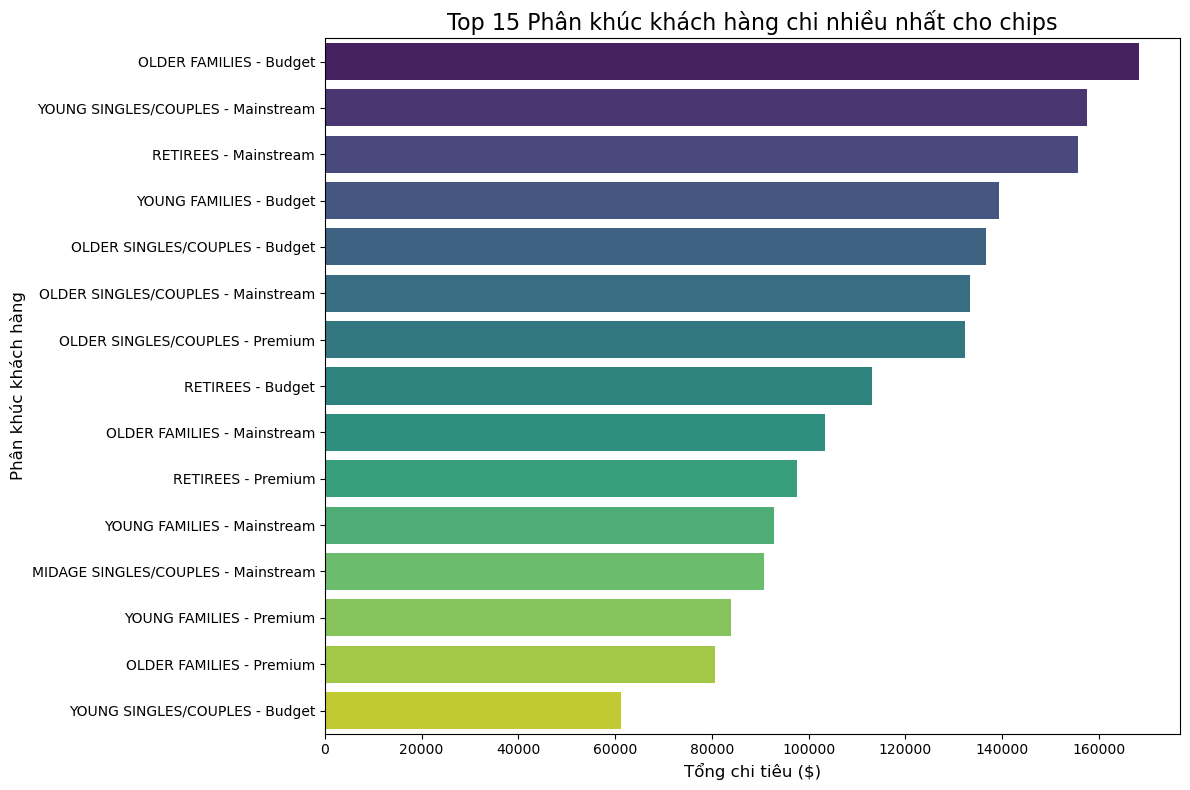

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15, x='Total_Sales', y='Segment', palette='viridis')
plt.title('Top 15 Phân khúc khách hàng chi nhiều nhất cho chips', fontsize=16)
plt.xlabel('Tổng chi tiêu ($)', fontsize=12)
plt.ylabel('Phân khúc khách hàng', fontsize=12)
plt.tight_layout()
plt.show()

In [64]:
#Chi tieu trung bình theo moi phan khuc
avg_per_trans = merged_df.groupby('Segment')['Avg_Sales_Per_Trans'].mean().reset_index()
top_15_avg = avg_per_trans.nlargest(15, 'Avg_Sales_Per_Trans')

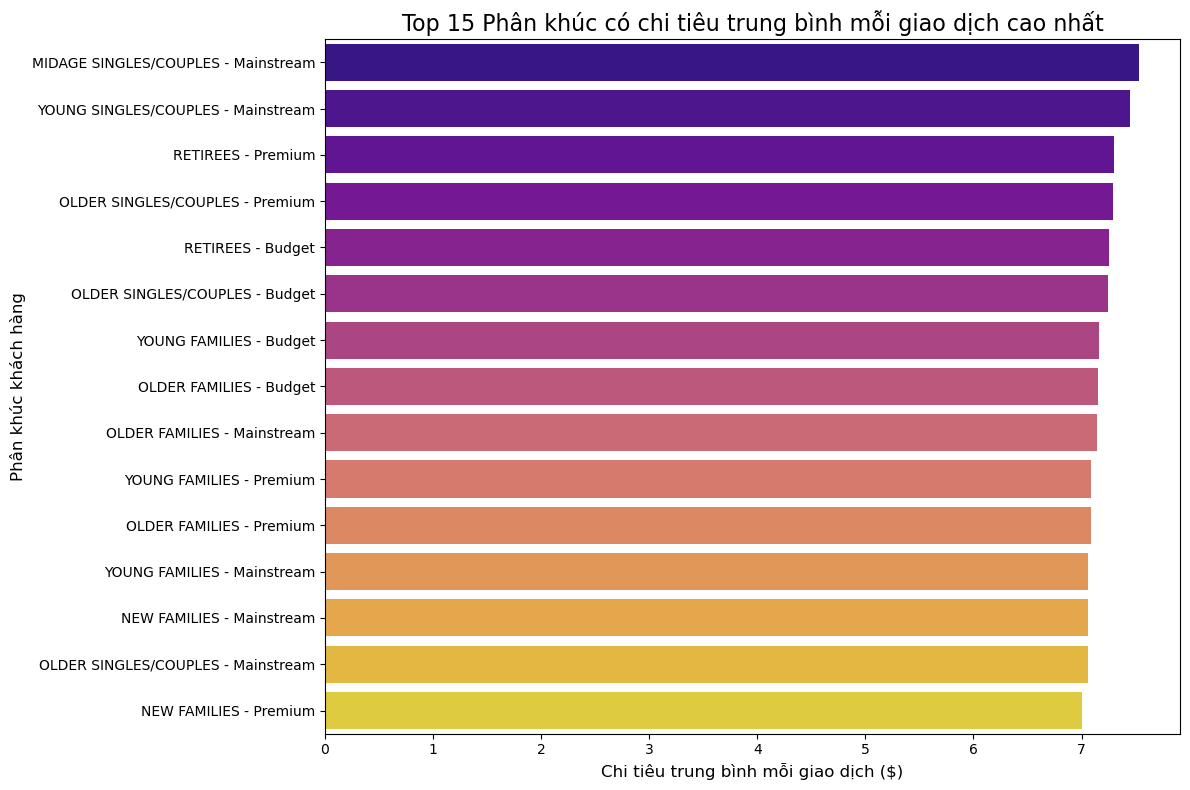

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_avg, x='Avg_Sales_Per_Trans', y='Segment', palette='plasma')
plt.title('Top 15 Phân khúc có chi tiêu trung bình mỗi giao dịch cao nhất', fontsize=16)
plt.xlabel('Chi tiêu trung bình mỗi giao dịch ($)', fontsize=12)
plt.ylabel('Phân khúc khách hàng', fontsize=12)
plt.tight_layout()
plt.show()

In [66]:
#Tan suat giao dich theo phan khuc
trans_freq = merged_df.groupby('Segment')['Num_Transactions'].sum().reset_index()
top_15_freq = trans_freq.nlargest(15, 'Num_Transactions')


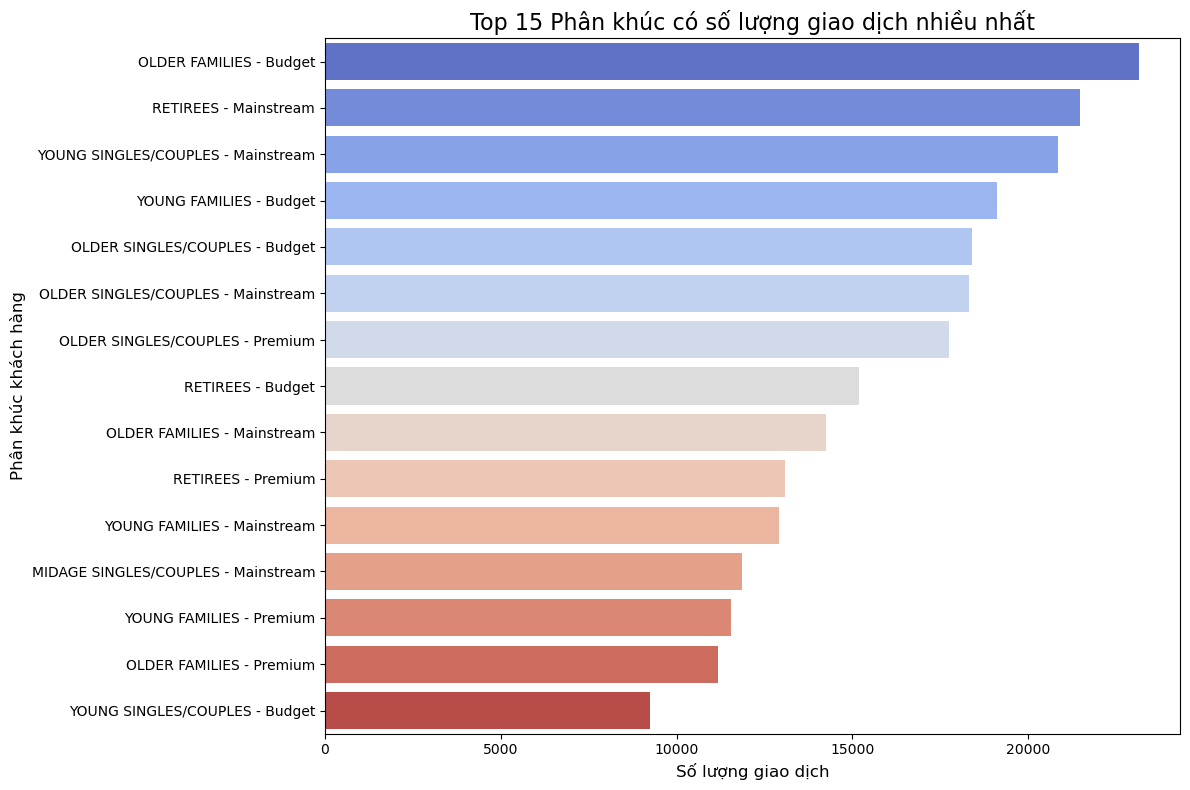

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_freq, x='Num_Transactions', y='Segment', palette='coolwarm')
plt.title('Top 15 Phân khúc có số lượng giao dịch nhiều nhất', fontsize=16)
plt.xlabel('Số lượng giao dịch', fontsize=12)
plt.ylabel('Phân khúc khách hàng', fontsize=12)
plt.tight_layout()
plt.show()

In [68]:
# Gia trung binh moi goi theo phan khuc
# Tính giá trung bình mỗi gói
merged_df['Avg_Price_Per_Packet'] = merged_df['Total_Sales'] / merged_df['Total_Prod_Qty']

In [69]:
# Tính trung bình theo phân khúc
avg_price_per_seg = merged_df.groupby('Segment')['Avg_Price_Per_Packet'].mean().reset_index()
top_15_price = avg_price_per_seg.nlargest(15, 'Avg_Price_Per_Packet')

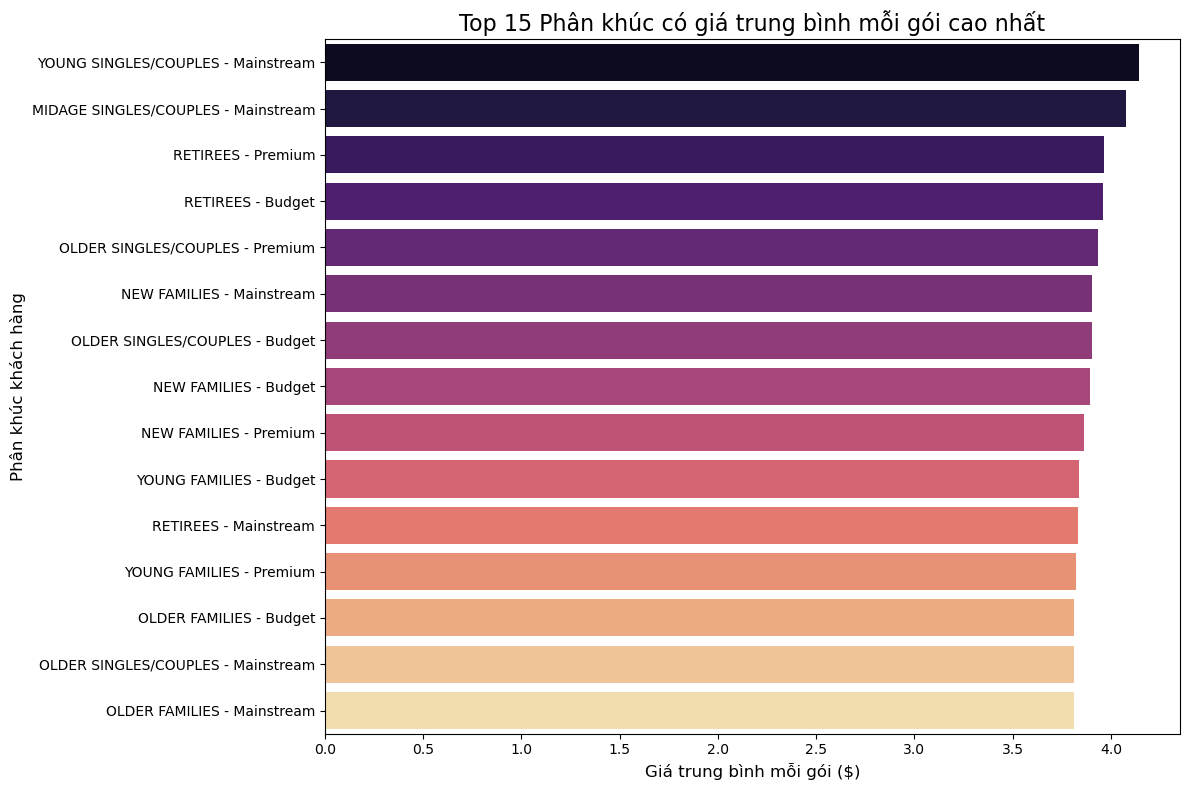

In [70]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15_price, x='Avg_Price_Per_Packet', y='Segment', palette='magma')
plt.title('Top 15 Phân khúc có giá trung bình mỗi gói cao nhất', fontsize=16)
plt.xlabel('Giá trung bình mỗi gói ($)', fontsize=12)
plt.ylabel('Phân khúc khách hàng', fontsize=12)
plt.tight_layout()
plt.show()

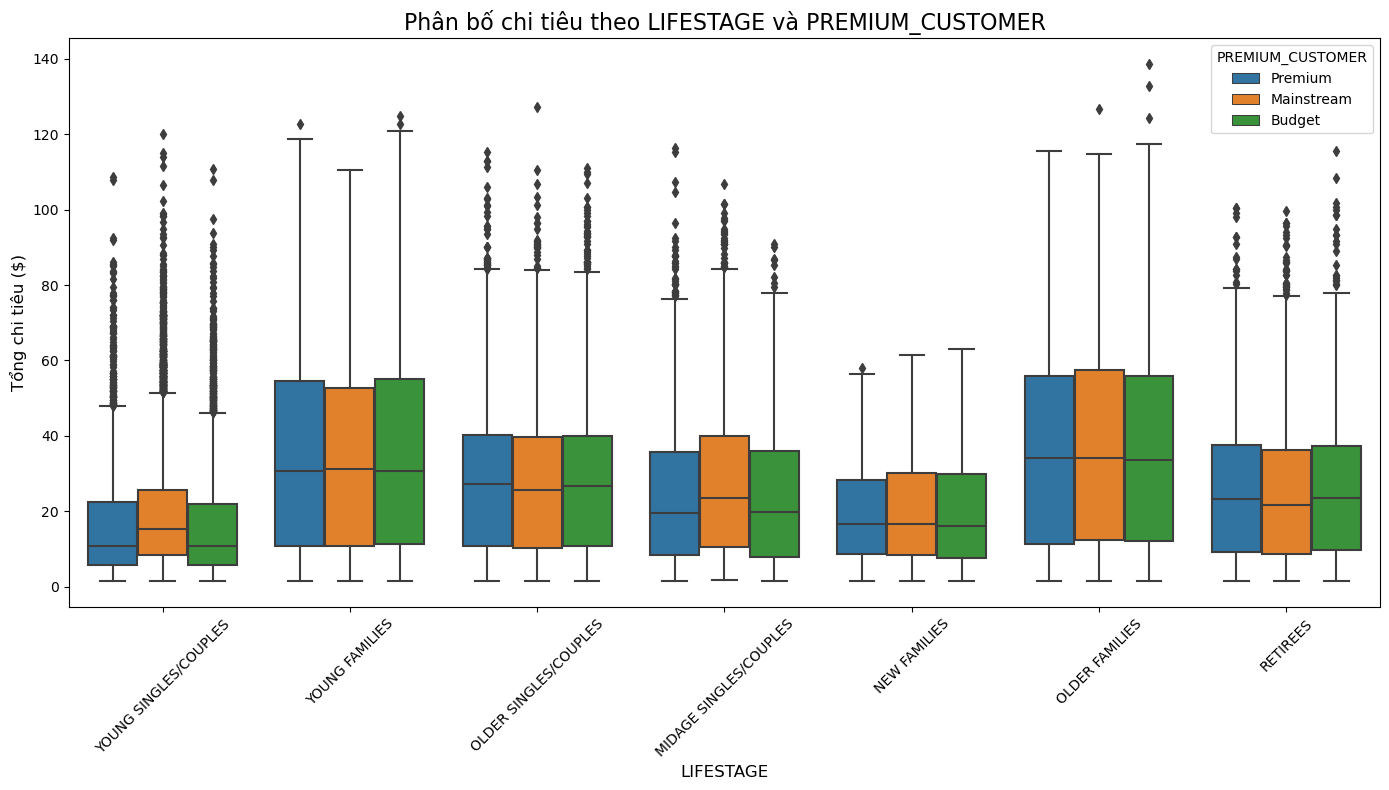

In [71]:
#SS giua Prenium va Mainstream
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='LIFESTAGE', y='Total_Sales', hue='PREMIUM_CUSTOMER')
plt.title('Phân bố chi tiêu theo LIFESTAGE và PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Tổng chi tiêu ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()